In [1]:
import py21cmfast as cm21
import logging, sys, os
import matplotlib.pyplot as plt
from py21cmfast import cache_tools
from py21cmfast import plotting

/Users/dmitryzenko/miniconda3/envs/cm21fast/lib/python3.11/site-packages/py21cmfast/_cfg.py:57: UserWarning: Your configuration file is out of date. Updating...
  warnings.warn(
/Users/dmitryzenko/miniconda3/envs/cm21fast/lib/python3.11/site-packages/py21cmfast/_cfg.py:41: UserWarning: Your configuration file is out of date. Updating...
  warnings.warn("Your configuration file is out of date. Updating...")


In [2]:
#%matplotlib inline
# uncomment above if want the plots to appear embedded into notebook

In [3]:
# We change the default level of the logger so that
# we can see what's happening with caching.

logger = logging.getLogger('21cmFAST')
logger.setLevel(logging.INFO)

In [4]:
# CLEARS CACHE (and create a folder if non-existent)

def clear_cache():
    if not os.path.exists('_cache'):
        os.mkdir('_cache')

    cm21.config['direc'] = '_cache'
    cache_tools.clear_cache(direc="_cache")

In [5]:
# Uncomment below and run to clear cache

#clear_cache()

---

# Running and plotting coeval cubes

In [6]:
cm21.config['direc'] = '_cache'

coeval8 = cm21.run_coeval(
    redshift = 8.0,
    user_params = {"HII_DIM": 100, "BOX_LEN": 100, "USE_INTERPOLATION_TABLES": True},
    cosmo_params = cm21.CosmoParams._defaults_,
    astro_params = cm21.AstroParams._defaults_,
    random_seed=12345
)

/Users/dmitryzenko/miniconda3/envs/cm21fast/lib/python3.11/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/Users/dmitryzenko/miniconda3/envs/cm21fast/lib/python3.11/site-packages/py21cmfast/_utils.py:815: UserWarning: Trying to remove array that isn't yet created: hires_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/Users/dmitryzenko/miniconda3/envs/cm21fast/lib/python3.11/site-packages/py21cmfast/_utils.py:815: UserWarning: Trying to remove array that isn't yet created: hires_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/Users/dmitryzenko/miniconda3/envs/cm21fast/lib/python3.11/site-packages/py21cmfast/_utils.py:815: UserWarning: Trying to remove array that isn't yet created: hires_vz
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/Users/dmitryzenko/miniconda3/envs/cm21fast/lib/python3.11/site-packages/py21c

In [7]:
print("Redshift: ", coeval8.redshift)
print(coeval8.user_params)
print(coeval8.cosmo_params) # Check that default cosmo_params are set to Planck18
print(coeval8.astro_params)

Redshift:  8.0
UserParams:
    BOX_LEN                 : 100
    DIM                     : 300
    FAST_FCOLL_TABLES       : False
    HII_DIM                 : 100
    HMF                     : 1
    MINIMIZE_MEMORY         : False
    NON_CUBIC_FACTOR        : 1.0
    NO_RNG                  : False
    N_THREADS               : 1
    PERTURB_ON_HIGH_RES     : False
    POWER_SPECTRUM          : 0
    USE_2LPT                : True
    USE_FFTW_WISDOM         : False
    USE_INTERPOLATION_TABLES: True
    USE_RELATIVE_VELOCITIES : False
    
CosmoParams:
    OMb        : 0.04897468161869667
    OMm        : 0.30964144154550644
    POWER_INDEX: 0.9665
    SIGMA_8    : 0.8102
    hlittle    : 0.6766
    
AstroParams:
    ALPHA_ESC       : -0.5
    ALPHA_STAR      : 0.5
    ALPHA_STAR_MINI : 0.5
    A_LW            : 2.0
    A_VCB           : 1.0
    BETA_LW         : 0.6
    BETA_VCB        : 1.8
    F_ESC10         : 0.1
    F_ESC7_MINI     : 0.01
    F_H2_SHIELD     : 0.0
    F_STAR1

In [8]:
# Can save the file to cache for later use:


'''
filename = coeval8.save(direc='_cache')
print(os.path.basename(filename))
new_coeval8 = cm21.Coeval.read(filename, direc='.')
'''

"\nfilename = coeval8.save(direc='_cache')\nprint(os.path.basename(filename))\nnew_coeval8 = cm21.Coeval.read(filename, direc='.')\n"

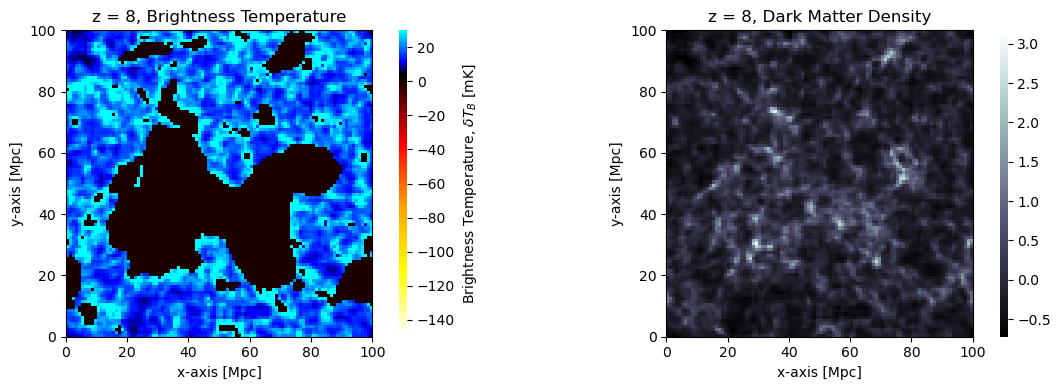

In [9]:
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(121)
plotting.coeval_sliceplot(coeval8, ax=ax1, fig=fig)
plt.title("z = 8, Brightness Temperature")

ax2 = fig.add_subplot(122)
plotting.coeval_sliceplot(coeval8, kind='density', ax=ax2, fig=fig, cmap='bone')
plt.title("z = 8, Dark Matter Density")

plt.tight_layout()
plt.show()

In [10]:
#You can also write the struct anywhere you’d like on the filesystem.
#This will not be able to be automatically used as a cache,
#but it could be useful for sharing files with colleagues.

# coeval8.init_struct.save(fname='my_init_struct.h5')

## Set up initial conditions

### (Before any redshift)

In [11]:
HII_DIM = int(400)
DIM = int(3*HII_DIM)
Mpc = 2000

initial_conditions = cm21.initial_conditions(
                                    user_params = {"DIM": DIM ,"HII_DIM": HII_DIM, "BOX_LEN": Mpc, "USE_INTERPOLATION_TABLES": True},
                                    cosmo_params = cm21.CosmoParams._defaults_,
                                    random_seed=4321
                                    )     

In [12]:
print(initial_conditions.cosmo_params)
print(initial_conditions.user_params)


CosmoParams:
    OMb        : 0.04897468161869667
    OMm        : 0.30964144154550644
    POWER_INDEX: 0.9665
    SIGMA_8    : 0.8102
    hlittle    : 0.6766
    
UserParams:
    BOX_LEN                 : 2000
    DIM                     : 1200
    FAST_FCOLL_TABLES       : False
    HII_DIM                 : 400
    HMF                     : 1
    MINIMIZE_MEMORY         : False
    NON_CUBIC_FACTOR        : 1.0
    NO_RNG                  : False
    N_THREADS               : 1
    PERTURB_ON_HIGH_RES     : False
    POWER_SPECTRUM          : 0
    USE_2LPT                : True
    USE_FFTW_WISDOM         : False
    USE_INTERPOLATION_TABLES: True
    USE_RELATIVE_VELOCITIES : False
    


In [13]:
initial_conditions.fieldnames

# The fields that can be visualised (not all of them are visualisable tho)

['lowres_density',
 'lowres_vx',
 'lowres_vy',
 'lowres_vz',
 'lowres_vx_2LPT',
 'lowres_vy_2LPT',
 'lowres_vz_2LPT',
 'hires_density',
 'hires_vx',
 'hires_vy',
 'hires_vz',
 'hires_vx_2LPT',
 'hires_vy_2LPT',
 'hires_vz_2LPT',
 'lowres_vcb']

(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='x-axis [Mpc]', ylabel='y-axis [Mpc]'>)

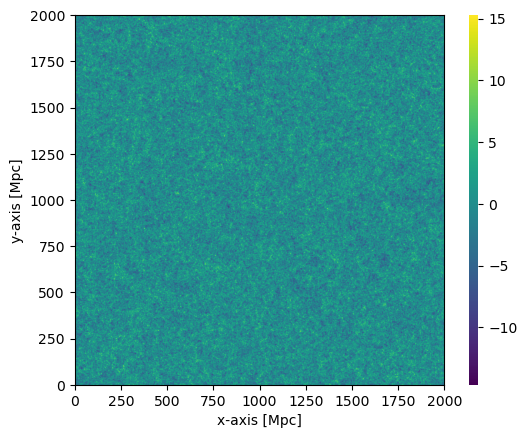

In [14]:
plotting.coeval_sliceplot(initial_conditions, "hires_density")

## After we have the initial conditions, we can perturb them to see how they evolve with redshift

In [15]:
perturbed_field = cm21.perturb_field(
    redshift = 8.0,
    init_boxes = initial_conditions
)

print(perturbed_field.fieldnames)

ValueError: Trying to use InitialConditions(UserParams(BOX_LEN:2000, DIM:1200, FAST_FCOLL_TABLES:False, HII_DIM:400, HMF:1, MINIMIZE_MEMORY:False, NON_CUBIC_FACTOR:1, NO_RNG:False, N_THREADS:1, PERTURB_ON_HIGH_RES:False, POWER_SPECTRUM:0, USE_2LPT:True, USE_FFTW_WISDOM:False, USE_INTERPOLATION_TABLES:True, USE_RELATIVE_VELOCITIES:False);
	CosmoParams(OMb:0.04897, OMm:0.3096, POWER_INDEX:0.9665, SIGMA_8:0.8102, hlittle:0.6766);
	random_seed:4321) to compute PerturbedField(UserParams(BOX_LEN:2000, DIM:1200, FAST_FCOLL_TABLES:False, HII_DIM:400, HMF:1, MINIMIZE_MEMORY:False, NON_CUBIC_FACTOR:1, NO_RNG:False, N_THREADS:1, PERTURB_ON_HIGH_RES:False, POWER_SPECTRUM:0, USE_2LPT:True, USE_FFTW_WISDOM:False, USE_INTERPOLATION_TABLES:True, USE_RELATIVE_VELOCITIES:False);
	CosmoParams(OMb:0.04897, OMm:0.3096, POWER_INDEX:0.9665, SIGMA_8:0.8102, hlittle:0.6766);
	random_seed:4321;
	redshift:8.0), but some required arrays are not computed!

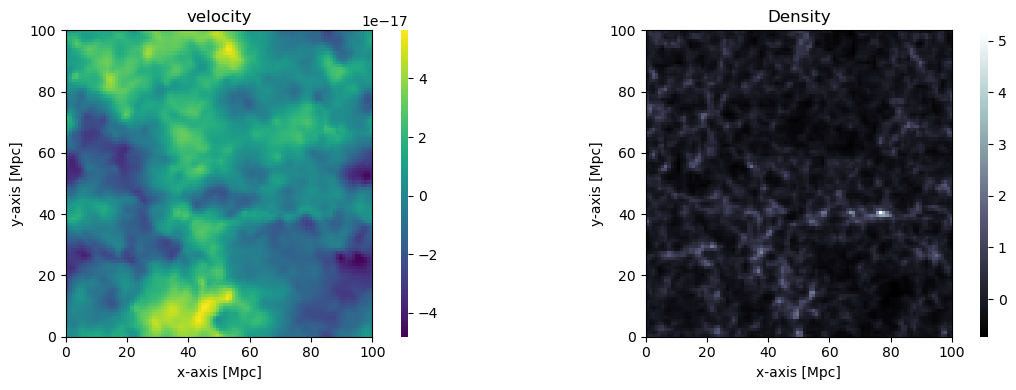

In [ ]:
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(121)
plotting.coeval_sliceplot(perturbed_field, "velocity", ax=ax1, fig=fig)
plt.title("velocity")

ax2 = fig.add_subplot(122)
plotting.coeval_sliceplot(perturbed_field, "density", ax=ax2, fig=fig, cmap='bone')
plt.title("Density")

plt.tight_layout()
plt.show()

## Spin Temperature

/Users/dmitryzenko/anaconda3/lib/python3.11/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(


(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='x-axis [Mpc]', ylabel='y-axis [Mpc]'>)

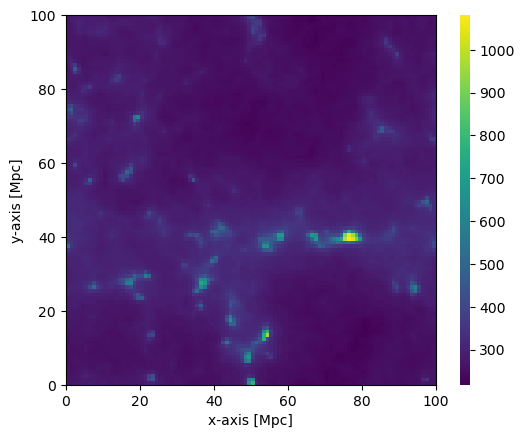

In [ ]:
spin_temp = cm21.spin_temperature(
    perturbed_field = perturbed_field,
    zprime_step_factor=1.05,
)

plotting.coeval_sliceplot(spin_temp, "Ts_box")

## Ionization of the box

In the simplest case the ionization occurs at the saturated limit, which means we can directly calculate the ionization on the density/velocity fields that we already have.

In [ ]:
ionized_box = cm21.ionize_box(
    spin_temp = spin_temp,
    zprime_step_factor=1.05,
)

In [ ]:
ionized_box.fieldnames

['mean_f_coll',
 'mean_f_coll_MINI',
 'log10_Mturnover_ave',
 'log10_Mturnover_MINI_ave',
 'xH_box',
 'Gamma12_box',
 'MFP_box',
 'z_re_box',
 'dNrec_box',
 'temp_kinetic_all_gas',
 'Fcoll',
 'Fcoll_MINI']

the first_box field is actually just a flag to tell the C code whether this has been evolved or not. Here, it hasn’t been, it’s the “first box” of an evolutionary chain.

(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='x-axis [Mpc]', ylabel='y-axis [Mpc]'>)

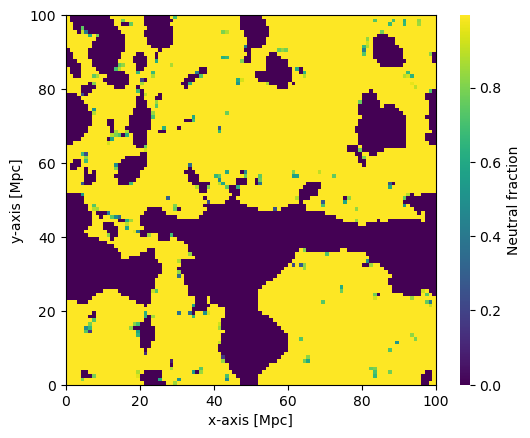

In [ ]:
plotting.coeval_sliceplot(ionized_box, "xH_box")

## Finally, Brightness Temperature

(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='x-axis [Mpc]', ylabel='y-axis [Mpc]'>)

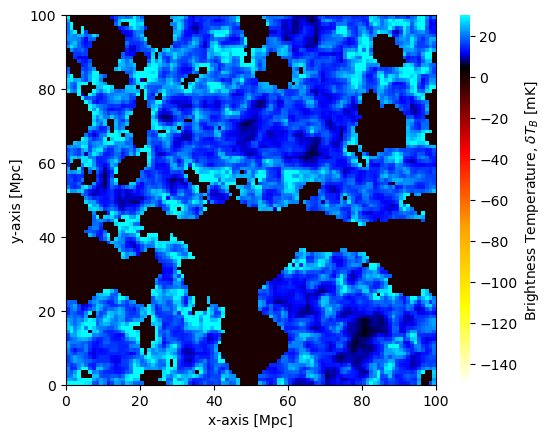

In [ ]:
brightness_temp = cm21.brightness_temperature(
    ionized_box = ionized_box,
    perturbed_field = perturbed_field,
    spin_temp = spin_temp
)

plotting.coeval_sliceplot(brightness_temp)